## Interpreting the results of linear regression
Perform linear regression on simulated data to predict the weight of adult women using height and shoe size.  The results are discussed in a [blog post](http://efavdb.com/interpret-linear-regression).

In [1]:
# import some libraries. We use statsmodels.api.OLS for the linear regression since it contains a much 
# more detailed report on the results of the fit than sklearn.linear_model.LinearRegression

import numpy as np
import statsmodels.api as sm
import random
from scipy.stats import t, f
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# set the population parameters for the simulated data

# height in inches
mean_height = 65
std_height = 2.25

# shoe size in inches
mean_shoe_size = 7.5
std_shoe_size = 1.25

# correlation b/w height and shoe size
r_height_shoe = 0.98
# covariance b/w height and shoe size
var_height_shoe = r_height_shoe*std_height*std_shoe_size

# matrix of means
mu = (mean_height, mean_shoe_size)
# covariance matrix for two-regressor model
cov = [[np.square(std_height), var_height_shoe],
        [var_height_shoe, np.square(std_shoe_size)]]

In [3]:
# Generate the simulated data

# number of data points
n = 20
random.seed(85)

# height and shoe size
X1 = np.random.multivariate_normal(mu, cov, n)
# height, alone
X0 = X1[:, 0]

weight = -220 + np.random.normal(X0*5.5, 10, n)

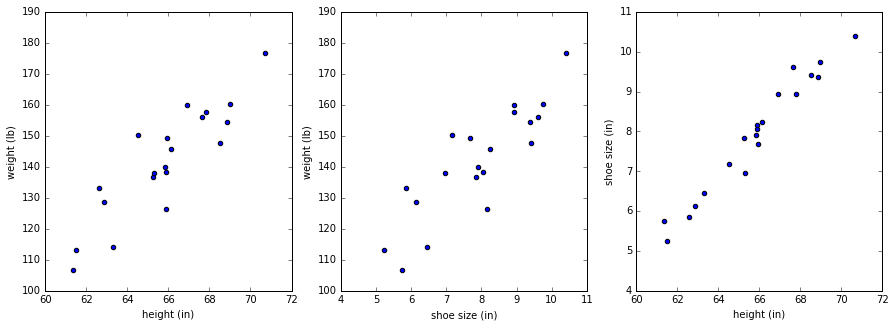

In [4]:
# Plot simulated data
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.subplot(1,3,1)
# weight v. height
plt.scatter(X1[:,0], weight)
plt.xlabel('height (in)')
plt.ylabel('weight (lb)')

plt.subplot(1,3,2)
# weight v. shoe size
plt.scatter(X1[:,1], weight)
plt.xlabel('shoe size (in)')
plt.ylabel('weight (lb)')

plt.subplot(1,3,3)
# height v. shoe size
plt.scatter(X1[:,0], X1[:,1])
plt.xlabel('height (in)')
plt.ylabel('shoe size (in)')

plt.show()

In [5]:
# Fit the linear models
# add column of ones for intercept
X0 = sm.add_constant(X0)
X1 = sm.add_constant(X1)

sm0 = sm.OLS(weight, X0).fit()
sm1 = sm.OLS(weight, X1).fit()

In [6]:
# print summaries of fit
print('linear model: weight ~ height\n')
print(sm0.summary(), '\n')

linear model: weight ~ height

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     66.87
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.79e-07
Time:                        14:28:08   Log-Likelihood:                -70.020
No. Observations:                  20   AIC:                             144.0
Df Residuals:                      18   BIC:                             146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -265.2764

In [7]:
print('linear model: weight ~ height + shoe_size\n')
print(sm1.summary(), '\n')

linear model: weight ~ height + shoe_size

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     31.86
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.78e-06
Time:                        14:28:08   Log-Likelihood:                -69.951
No. Observations:                  20   AIC:                             145.9
Df Residuals:                      17   BIC:                             148.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const    

In [8]:
# Calculate values manually for the two-regressor model: weight ~ height + shoe_size
# OLS solution, eqn of form ax=b => (X'X)*beta_hat = X'*y
beta_hat = np.linalg.solve(np.dot(X1.T, X1), np.dot(X1.T, weight))
print('beta_hat:', beta_hat, '\n')

# residuals
epsilon = weight - np.dot(X1, beta_hat)

# degrees of freedom of residuals
dof = X1.shape[0] - X1.shape[1]
print('degrees of freedom of residuals:', dof, '\n')

# best estimator of sigma
sigma_hat = np.sqrt(np.dot(epsilon, epsilon) / dof)
print('sigma_hat:', sigma_hat, '\n')

# standard error of beta_hat
s = sigma_hat * np.sqrt(np.diag(np.linalg.inv(np.dot(X1.T, X1)), 0))
print('standard error of beta_hat:', s, '\n')

# 95% confidence intervals
# +/-t_{1-alpha/2, n-K} = t.interval(1-alpha, dof)
conf_intervals = beta_hat.reshape(3,1) + s.reshape(3,1) * np.array(t.interval(0.95, dof))
print('confidence intervals:\n', conf_intervals, '\n')

# t-statistics under null hypothesis
t_stat = beta_hat / s
print('t-statistics:', t_stat, '\n')

# p-values
# survival function sf=1-CDF
p_values = t.sf(abs(t_stat), dof)*2
print('p-values of t-statistics:', p_values)

# SSR (regression sum of squares)
y_hat = np.dot(X1, beta_hat)
y_mu = np.mean(weight)
mean_SSR = np.dot((y_hat - y_mu).T, (y_hat - y_mu))/(len(beta_hat)-1)

# f-statistic
f_stat = mean_SSR / np.square(sigma_hat)
print('f-statistic:', f_stat, '\n')

# p-value of f-statistic
p_values_f_stat = f.sf(abs(f_stat), dfn=(len(beta_hat)-1), dfd=dof)
print('p-value of f-statistic:', p_values_f_stat, '\n')

beta_hat: [-333.15990097    7.49444671   -2.30898743] 

degrees of freedom of residuals: 17 

sigma_hat: 8.66991550428 

standard error of beta_hat: [ 204.60056111    3.89776076    6.73900599] 

confidence intervals:
 [[ -7.64829352e+02   9.85095501e+01]
 [ -7.29109662e-01   1.57180031e+01]
 [ -1.65270473e+01   1.19090724e+01]] 

t-statistics: [-1.62834305  1.92275698 -0.34263027] 

p-values of t-statistics: [ 0.1218417   0.07142839  0.73607656]
f-statistic: 31.8556171105 

p-value of f-statistic: 1.77777555162e-06 

